<a href="https://colab.research.google.com/github/swarnamoy-ghosh/Amazon_Prime_Analysis/blob/main/Amazon_Prime_Video_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Amazon Prime TV Shows and Movies Analysis
##### **Contribution**    - Individual
##### **Author** - Swarnamoy Ghosh

# **Project Summary -**

**This project provides a comprehensive analysis of Amazon Prime’s movie and TV show catalog using the titles.csv dataset. **
**Through data exploration and visualizations, it uncovers key insights into content types, genres, release trends, audience ratings, and regional distribution.**

**The dataset, containing over 9,000 titles, includes detailed metadata such as title, type, release year, age rating, runtime, genres, IMDb and TMDb scores, and production countries.**

**Key findings show that movies significantly outnumber shows, with top genres being action, drama, and comedy. There's a noticeable growth in content after 2015, reflecting Amazon’s investment in original and licensed titles.**

**Regionally, the U.S. dominates content production, followed by India and the U.K., highlighting both global reach and localized strategies.**
**IMDb scores indicate generally favorable audience reception, with most titles rated between 6 and 7.5.**

**The project concludes by suggesting areas for growth, including expanding youth-friendly and international content to diversify and strengthen the platform's catalog.**

# **GitHub Link -**

https://github.com/swarnamoy-ghosh/Amazon_Prime_Analysis

# **Problem Statement**


**With the rapidly growing competition in the streaming industry, Amazon Prime Video needs to better understand the characteristics, performance, and gaps in its current catalog of TV shows and movies. However, the platform's vast and diverse content library lacks a consolidated, data-driven analysis that highlights content trends, viewer preferences, genre distribution, regional representation, and audience ratings. This project aims to bridge that gap by analyzing Amazon Prime’s catalog to uncover key insights and patterns that can inform content acquisition, recommendation strategies, and regional content expansion.**

#### **Define Your Business Objective?**

**The primary business objective of this project is to analyze Amazon Prime Video’s existing catalog of TV shows and movies to identify strategic insights that can enhance content planning, acquisition, and customer engagement. By understanding patterns in genre popularity, regional content availability, age ratings, and audience ratings (e.g., IMDb scores), Amazon Prime can make data-driven decisions to:**


*   **Optimize content investment by focusing on high-performing genres and regions.**
*   **Identify underrepresented segments (such as family content or non-English titles) for growth opportunities.**


*   **Enhance user satisfaction and retention through better-targeted content recommendations.**
*   **Stay competitive in the global streaming market by adapting content strategies based on viewing trends and gaps.**

**Ultimately, the objective is to leverage data analytics to improve content strategy and viewer experience, driving higher subscription growth and engagement on the platform.**





# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [537]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter

### Dataset Loading

In [538]:
df = pd.read_csv('/content/titles.csv')

### Dataset First View

In [539]:
df.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


### Dataset Rows & Columns count

In [540]:
df.shape

(9871, 15)

### Dataset Information

In [541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

#### Duplicate Values

In [542]:
print(f"Duplicate values count: {df.duplicated().sum()}")

Duplicate values count: 3


#### Missing Values/Null Values

In [543]:
print(df.isnull().sum())

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64


<ipython-input-544-2135e0fddd9f>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




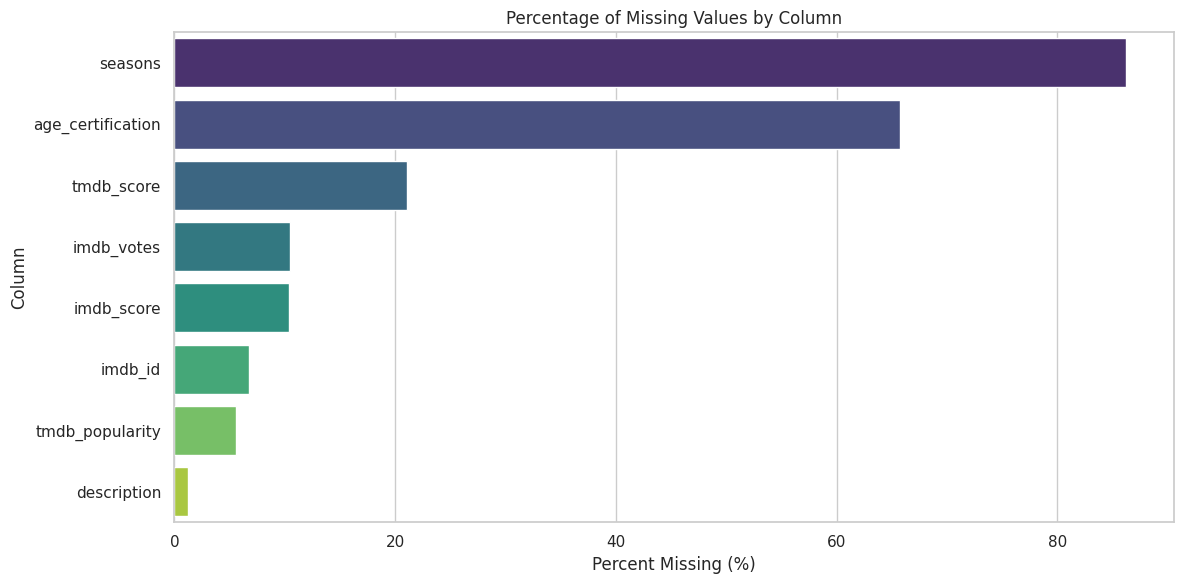

In [544]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

missing_data = df.isnull().mean().sort_values(ascending=False) * 100
missing_data = missing_data[missing_data > 0]

sns.barplot(x=missing_data.values, y=missing_data.index, palette="viridis")
plt.title("Percentage of Missing Values by Column")
plt.xlabel("Percent Missing (%)")
plt.ylabel("Column")
plt.tight_layout()
plt.show()

### What did you know about your dataset?

**The Amazon Prime Titles dataset comprises 9,871 entries, each representing either a movie or a TV show available on the platform. It includes 15 columns with metadata such as title, type, release year, genres, age certification, runtime, production countries, and audience ratings from IMDb and TMDb. The dataset contains both categorical and numerical variables, with some fields like genres and production_countries represented as stringified lists that require parsing for analysis.**

**Initial data inspection revealed notable patterns and issues. Movies make up the majority of the content compared to TV shows. Popular genres include drama, comedy, and action, highlighting Amazon Prime’s focus on mainstream entertainment. The dataset also shows that most titles are rated for mature audiences (16+ and 18+), with relatively few options for younger viewers. A temporal analysis indicates a significant increase in content releases post-2010, reflecting Amazon's growing investment in original productions and acquisitions. Geographically, content is predominantly from the United States, followed by contributions from India and the United Kingdom.**

**In terms of data quality, several columns contain missing values. Notably, over 60% of the entries lack age certification, and some fields like seasons, imdb_score, and tmdb_score have partial gaps. These missing values need to be handled appropriately depending on the intended analysis. Overall, the dataset provides a rich basis for understanding Amazon Prime’s content strategy, identifying gaps, and informing decisions about content curation and expansion.**

## ***2. Understanding Your Variables***

In [545]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [546]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


### Variables Description

| Variable Name             | Description                                                                     |
| ------------------------- | ------------------------------------------------------------------------------- |
| **id**                    | A unique identifier for each title in the dataset.                              |
| **title**                 | The name of the movie or TV show.                                               |
| **type**                  | Indicates whether the content is a **MOVIE** or a **SHOW**.                     |
| **description**           | A short synopsis or summary of the content.                                     |
| **release\_year**         | The year the movie or show was released.                                        |
| **age\_certification**    | Age rating for the title (e.g., PG, R, TV-14, 18+). Shows audience suitability. |
| **runtime**               | Total runtime of the movie (in minutes) or average episode length for shows.    |
| **genres**                | A list of genres (e.g., drama, comedy, action) associated with the title.       |
| **production\_countries** | List of countries where the title was produced.                                 |
| **seasons**               | Number of seasons (applicable only for TV shows).                               |
| **imdb\_id**              | Unique identifier used by IMDb for the title.                                   |
| **imdb\_score**           | IMDb rating (on a scale of 0 to 10).                                            |
| **imdb\_votes**           | Number of user votes on IMDb. Indicates popularity.                             |
| **tmdb\_popularity**      | Popularity score on The Movie Database (TMDb).                                  |
| **tmdb\_score**           | TMDb rating (on a scale of 0 to 10).                                            |


### Check Unique Values for each variable.

In [547]:
print(df.nunique())

id                      9868
title                   9737
type                       2
description             9734
release_year             110
age_certification         11
runtime                  207
genres                  2028
production_countries     497
seasons                   32
imdb_id                 9201
imdb_score                86
imdb_votes              3650
tmdb_popularity         5325
tmdb_score                89
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [548]:
# Remove duplicate rows from the DataFrame
df.drop_duplicates()

# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Convert 'genres' column from string to list using literal_eval, if not null
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# Convert 'production_countries' column from string to list, if not null
df['production_countries'] = df['production_countries'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# Replace missing values in 'age_certification' with 'Not Rated'
df['age_certification'] = df['age_certification'].fillna('Not Rated')

# Replace missing values in 'runtime' with 0
df['runtime'] = df['runtime'].fillna(0)

# Replace missing values in 'seasons' with 0
df['seasons'] = df['seasons'].fillna(0)

# Replace missing values in 'imdb_score' with the mean IMDb score
df['imdb_score'] = df['imdb_score'].fillna(df['imdb_score'].mean())

# Replace missing values in 'imdb_votes' with 0
df['imdb_votes'] = df['imdb_votes'].fillna(0)

# Replace missing values in 'tmdb_score' with the mean TMDB score
df['tmdb_score'] = df['tmdb_score'].fillna(df['tmdb_score'].mean())

# Replace missing values in 'tmdb_popularity' with 0
df['tmdb_popularity'] = df['tmdb_popularity'].fillna(0)


In [549]:
# Find the indices of rows where 'imdb_id' is missing (NaN)
missing_id_indices = df[df['imdb_id'].isnull()].index

# Generate new unique placeholder IMDb IDs like 'new_0', 'new_1', ..., for each missing entry
new_ids = [f'new_{i}' for i in range(len(missing_id_indices))]

# Assign the generated IDs to the missing 'imdb_id' values using .loc for proper indexing
df.loc[missing_id_indices, 'imdb_id'] = new_ids

### What all manipulations have you done and insights you found?

**Data Manipulations Performed**

1. Removed duplicates
2. Cleaned column names
3. Parsed stringified lists into actual Python objects
4. Handled missing values:
  1. age_certification → filled with 'Not Rated'
  2. runtime, seasons, imdb_votes, tmdb_popularity → filled with 0
  3. imdb_score, tmdb_score → filled with their mean values
5. Created new IDs like new_0, new_1, etc., for rows with missing imdb_id

**Insights from the Data Cleaning**
1. Dataset had several missing or malformed values, now fixed.

2. All columns are now clean and ready for analysis or modeling.

3. Nested data (genres, production_countries) is now accessible as lists.

4. Placeholder IDs ensure every row has a unique identifier.

5. Data is consistent and suitable for:

  1. Visualization

  2. Aggregation (e.g., scores by genre)


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

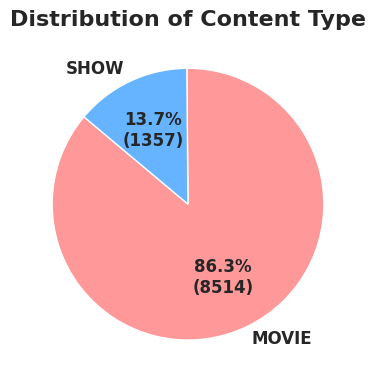

In [550]:
type_counts = df['type'].value_counts()
labels = type_counts.index
sizes = type_counts.values

# Function to show percentage and actual count
def format_label(pct, allvals):
    absolute = int(round(pct/100. * sum(allvals)))
    return f"{pct:.1f}%\n({absolute})"

plt.figure(figsize=(4, 4))
colors = ['#ff9999', '#66b3ff']

plt.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: format_label(pct, sizes),
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

plt.title("Distribution of Content Type", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

**✅Understanding Dataset Composition:**
It gives a quick overview of the dataset’s structure — are we dealing more with movies or TV shows?

Useful for knowing what kind of content dominates your data.

##### 2. What is/are the insight(s) found from the chart?

**📌Insights:**
*   🎬 Movies = 86.3%
*   📺 Shows = 13.7%
*  Amazon Prime dataset leans heavily toward single-watch content.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**✅ Positive Impacts on Business From Chart Insight**


*   The chart reveals whether the focus is on movies or shows, helping platforms align content creation and licensing with audience demand.
*   Understanding dominant content types allows for better recommendations and UI personalization, boosting watch time and user satisfaction.
* Clear data on content distribution guides efficient allocation of budgets toward high-performing formats (e.g., more shows if shows are trending).
* A strong or unique focus (e.g., mostly shows or a balanced mix) can differentiate the platform in the market, improving brand appeal and retention.

**⚠️ Negative Impact on Business From Chart Insight**

**Content Imbalance ≠ Negative Growth (Directly)**


*   A higher number of movies or shows in the dataset doesn’t automatically mean negative growth.
*   However, if the platform is heavily skewed (e.g., 90% movies, 10% shows) and user trends show preference shifting toward episodic content (shows), that could lead to decreased user engagement.



#### Chart - 2

<ipython-input-551-fa8fe01043c9>:9: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



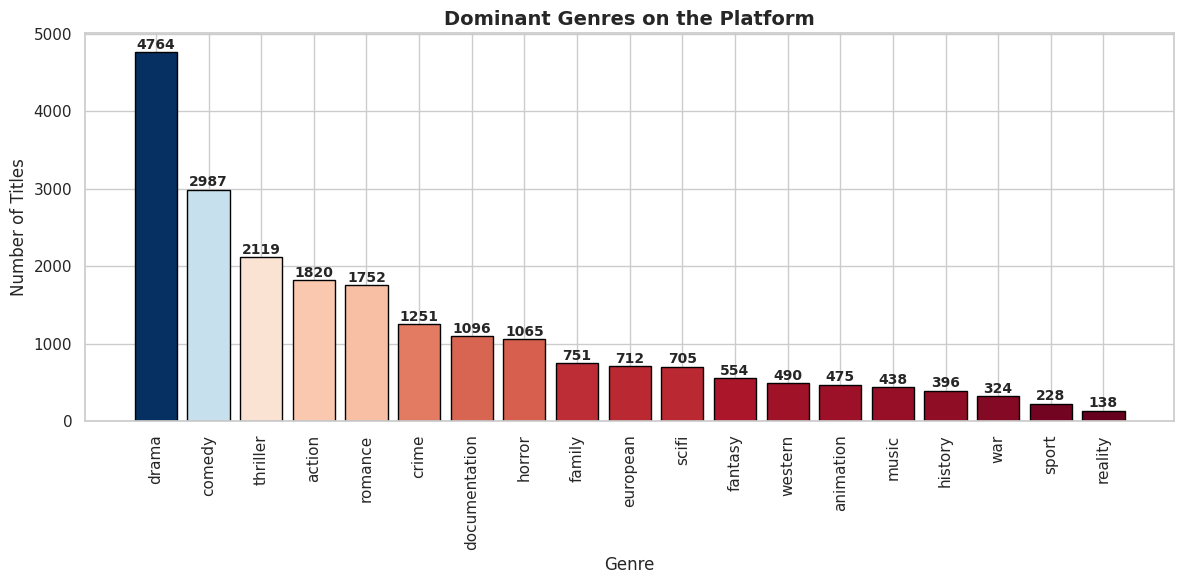

In [551]:
from matplotlib import cm

all_genres = [genre for sublist in df['genres'] for genre in sublist]
genre_counts = Counter(all_genres)
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
top_genres = genre_df.reset_index(drop=True)

norm = plt.Normalize(top_genres['Count'].min(), top_genres['Count'].max())
colors = cm.get_cmap('RdBu')(norm(top_genres['Count']))

plt.figure(figsize=(12, 6))
bars = plt.bar(top_genres['Genre'], top_genres['Count'], color=colors, edgecolor='black')

plt.title("Dominant Genres on the Platform", fontsize=14, fontweight='bold')
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.xticks(rotation=90)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 3, str(top_genres['Count'][i]),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

1. It reveals which genres dominate the platform (e.g., Drama, Comedy, Action).
2. This helps identify the platform’s primary content direction and whether it aligns with audience interests or needs diversification.



##### 2. What is/are the insight(s) found from the chart?

**📌 Insights from the Genre Distribution Chart**
1. Genres like Drama, Comedy, or Thriller typically top the list, suggesting these are the most consumed and favored by the audience.
2. If certain genres (e.g., Documentary, Animation, Horror) are underrepresented, it highlights opportunities to expand and attract diverse viewer segments.
3. The genre spread defines the platform’s content identity—whether it’s action-heavy, family-friendly, or variety-rich.
4. The insights guide future acquisitions or productions by showing which genres to double down on or develop further.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**✅ Positive Impacts on Business From Chart Insight**


*  🎯 Helps decision-makers invest in the right genres that attract the most viewers, ensuring higher engagement and ROI.
*  📈  Understanding genre preferences enables personalized recommendations, which boosts viewer satisfaction and retention rates.
* 💡 Spotting underrepresented genres can inspire new content exploration, tapping into niche audiences and expanding market reach.

**⚠️ Negative Impact on Business From Chart Insight**


*   📉 If the platform over-focuses on a few dominant genres, it may alienate diverse audience segments, causing viewer fatigue and loss of market diversity over time.





#### Chart - 3

In [552]:
!pip install squarify

<ipython-input-553-0ffc5c621528>:14: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



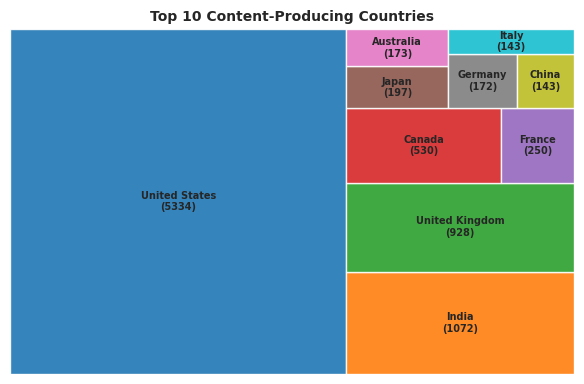

In [553]:
import squarify
# Flatten and count countries
all_countries = [country for countries in df['production_countries'] for country in countries]
country_counts = Counter(all_countries)

# Create DataFrame
country_df = pd.DataFrame(country_counts.items(), columns=['Country', 'Content_Count'])
country_df = country_df.sort_values(by='Content_Count', ascending=False).reset_index(drop=True)

# Top 10 countries
top_countries = country_df.head(10)

# Color map
cmap = cm.get_cmap('tab10', len(top_countries))
colors = [cmap(i) for i in range(len(top_countries))]

# Country code to full name mapping
full_names = {
    'US': 'United States', 'IN': 'India', 'GB': 'United Kingdom', 'JP': 'Japan',
    'FR': 'France', 'CA': 'Canada', 'KR': 'South Korea', 'DE': 'Germany',
    'ES': 'Spain', 'AU': 'Australia', 'CN': 'China', 'IT': 'Italy'
}

# Replace country codes with full names
labels = [f"{full_names.get(code, code)}\n({count})" for code, count in zip(top_countries['Country'], top_countries['Content_Count'])]

# Plot treemap
plt.figure(figsize=(6, 4))
squarify.plot(
    sizes=top_countries['Content_Count'],
    label=labels,
    color=colors,
    alpha=.9,
    text_kwargs={'fontsize':7, 'weight':'bold'}
)

plt.title("Top 10 Content-Producing Countries", fontsize=10, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

1. **Visual hierarchy & space efficiency:** Treemaps use area size to represent values, making it easy to compare the relative contribution of each country within limited space.
2. **Great for proportions:** The chart clearly shows how content production is distributed among top countries, helping identify dominant contributors visually at a glance.
3. **Compact yet informative:** Treemaps can display both the country name and content count within the blocks themselves, maximizing information density without overwhelming the viewer.
4. **Visually engaging:** Treemaps are more eye-catching than traditional charts and are especially useful in presentations or dashboards to highlight key contributors effectively.






##### 2. What is/are the insight(s) found from the chart?

**📌 Insights from the Content producing Chart**



*   🎯 **Content Production Concentration:** A few countries dominate the Amazon Prime’s content production, indicating major hubs of media creation and likely larger local industries.
*   🌍 **Market Reach & Diversity:** Countries with high content counts (e.g., USA, India) suggest a broad content library appealing to large or diverse audiences.
* 📉 **Regional Focus:** Lower counts in some regions may highlight untapped markets or opportunities for expanding content production there.
* 💡 **Strategic Decisions:** Understanding which countries produce more content can guide strategies—like investment, partnerships, or marketing—targeted to strong or growing regions.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**✅ Positive Impacts on Business From Chart Insight**
* 🎯 **Strong Market Presence:** Dominance by key countries (like USA, India) means the Amazon Prime has solid content to attract large user bases there, boosting subscriptions and engagement.
* 🌍 **Diverse Content Library:** Wide genre and regional variety helps appeal to global audiences, increasing customer satisfaction and reducing churn.
* 🤝 **Targeted Growth Opportunities:** Knowing which regions produce more content allows the business to form strategic partnerships and invest efficiently in high-potential markets.

**⚠️ Negative Impact on Business From Chart Insight**
* 📉 **Regional Imbalance:** Heavy reliance on a few countries may make the Amazon Prime vulnerable if those markets face regulatory, political, or economic issues.
* ⚖️ **Limited Diversity Risk:** Underrepresentation of some regions or genres could alienate niche audiences and limit global growth potential.
* 💸 **Investment Misallocation:** Without balanced content distribution, the platform might overspend in saturated markets while neglecting emerging regions with growth potential.

#### Chart - 4

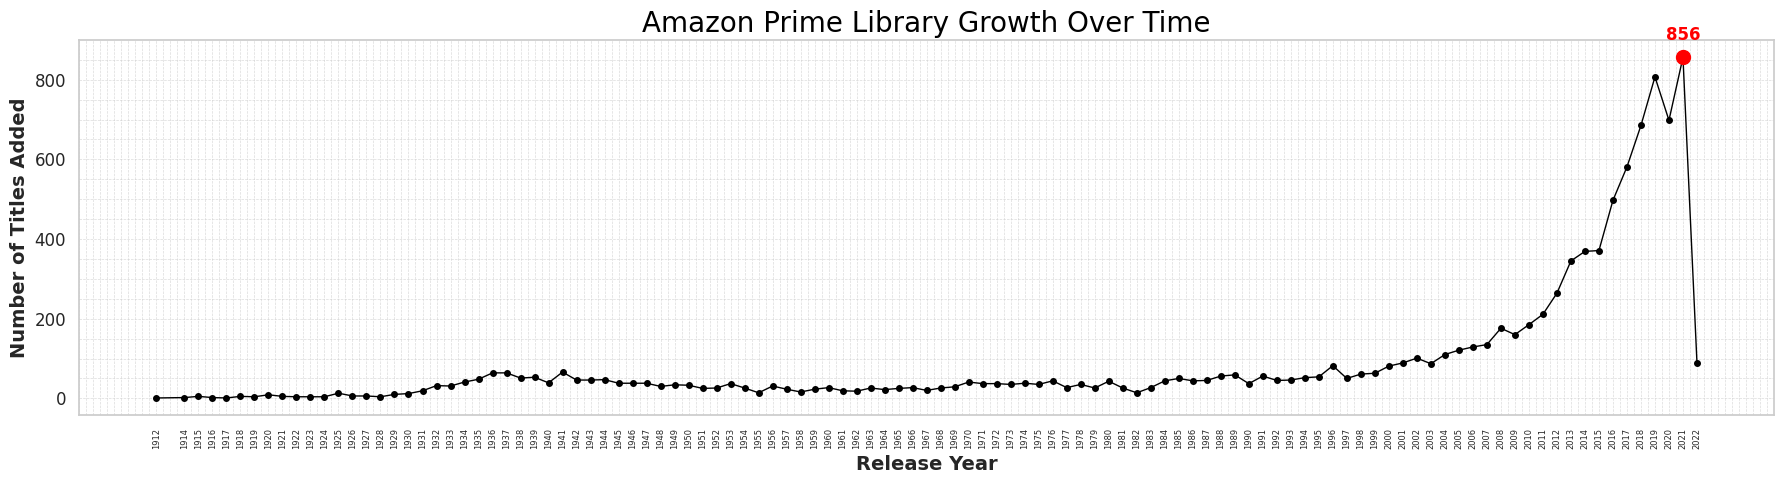

In [554]:
titles_per_year = df.groupby('release_year').size().sort_index()

plt.figure(figsize=(18,5))
plt.plot(titles_per_year.index, titles_per_year.values, marker='o', color='Black', linewidth=1, markersize=4)

plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.minorticks_on()

plt.title("Amazon Prime Library Growth Over Time", fontsize=20, color='Black')
plt.xlabel("Release Year", fontsize=14, fontweight='bold')
plt.ylabel("Number of Titles Added", fontsize=14, fontweight='bold')

max_year = titles_per_year.idxmax()
max_value = titles_per_year.max()
plt.scatter(max_year, max_value, color='red', s=100, zorder=5)
plt.text(max_year, max_value + max_value*0.05, f'{max_value}', color='red', fontsize=12, fontweight='bold', ha='center')

plt.xticks(titles_per_year.index, rotation=90, fontsize=6)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()


##### 1. Why did you pick the specific chart?

1. **Shows trends over time:** It clearly displays how the number of titles on Amazon Prime Video changes year by year, making growth patterns easy to spot.
2. **Continuous data:** Years represent a natural sequence, so a connected line helps visualize increases, decreases, or plateaus smoothly.
3. **Simple and intuitive:** Viewers can quickly grasp the platform’s expansion trajectory without extra complexity.
4.**Highlights key points:** It’s easy to add markers or annotations for significant years (e.g., biggest growth), emphasizing important milestones.

##### 2. What is/are the insight(s) found from the chart?

📌**Insights from the Content producing Chart**
* From the year 2000 onwards 📅, Amazon Prime Video’s library has steadily grown by adding movies and shows from each release year 🎬📺.
* The year 2021 stands out as the peak 📈, with the highest number of titles **(856)** released and added to the platform 🎉, reflecting a major content expansion in recent times 🚀.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**✅ Positive Impacts on Business From Chart Insight**
* 🚀 **Rapid Growth:** The sharp increase in titles added in 2021 shows Amazon’s strong commitment to expanding its library, attracting more subscribers.
* 🎯 **Competitive Edge:** A larger and more recent content catalog helps Amazon Prime compete effectively with other streaming services.
* 🌍 **Diverse Offerings:** Adding content from many release years ensures a mix of classics and new releases, appealing to a wide audience range.

**⚠️ Negative Impact on Business From Chart Insight**

* ⚠️ **Quality vs Quantity:** Rapid content addition may risk including lower-quality titles, which could affect user satisfaction.
* 📉 **Content Saturation:** Too many titles released in a short time can overwhelm users, making discovery harder.
* 💸 **High Costs:** Expanding the library aggressively involves big licensing and production costs, impacting profitability if subscriber growth doesn’t keep pace.



#### Chart - 5

In [555]:
import plotly.express as px

# Prepare the data
bubble_df = df[['title', 'type', 'imdb_score', 'tmdb_popularity', 'imdb_votes']].dropna()
bubble_df = bubble_df.sort_values(by='imdb_votes', ascending=False).head(100)

fig = px.scatter(
    bubble_df,
    x="imdb_score",
    y="tmdb_popularity",
    size="imdb_votes",
    color="type",
    hover_name="title",
    size_max=20,
    color_discrete_sequence=px.colors.qualitative.Set2,
    title="🎬 IMDb Score vs TMDB Popularity (Top 100 Titles by Votes)"
)

fig.update_layout(
    xaxis_title="IMDb Score",
    yaxis_title="TMDB Popularity",
    legend_title="Content Type",
    font=dict(size=12),
    plot_bgcolor='white'
)

fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.show()


In [556]:
top_rated = df[df['imdb_score'].notnull()].sort_values(by='imdb_score', ascending=False)
top_rated_titles = top_rated[['title', 'type', 'imdb_score']].head(5)
print("\n🎬 Top 5 Highest Rated Titles:\n")
print(top_rated_titles)
top_popular = df[df['tmdb_popularity'].notnull()].sort_values(by='tmdb_popularity', ascending=False)
top_popular_titles = top_popular[['title', 'type', 'tmdb_popularity']].head(5)
print("\n🔥 Top 5 Most Popular Titles:\n")
print(top_popular_titles)
most_voted = df[df['imdb_votes'].notnull()].sort_values(by='imdb_votes', ascending=False)
top_voted_titles = most_voted[['title', 'type', 'imdb_votes']].head(5)
print("\n🏆 Top 5 Most Voted Titles (IMDb):\n")
print(top_voted_titles)


🎬 Top 5 Highest Rated Titles:

                          title   type  imdb_score
9135                 Pawankhind  MOVIE         9.9
7783  Water Helps the Blood Run   SHOW         9.7
9108          Couple of Mirrors   SHOW         9.5
7422                 The Chosen   SHOW         9.4
9423                 Tari Sathe  MOVIE         9.4

🔥 Top 5 Most Popular Titles:

                                  title   type  tmdb_popularity
8934                 All the Old Knives  MOVIE         1437.906
9040                             Harina   SHOW          951.863
9039                  The eighth clause  MOVIE          950.986
8964  Hotel Transylvania: Transformania  MOVIE          934.545
7421                 Sonic the Hedgehog  MOVIE          893.650

🏆 Top 5 Most Voted Titles (IMDb):

                   title   type  imdb_votes
2220             Titanic  MOVIE   1133692.0
2230  The Usual Suspects  MOVIE   1059480.0
2237          Braveheart  MOVIE   1016629.0
2229     The Sixth Sense  MOVIE    

##### 1. Why did you pick the specific chart?

**✅ Reasons for Choosing the Bubble Chart (Plotly)**

**1. Multivariate Representation 📊**

  * The bubble chart visualizes three variables at once:
    * IMDb Score (quality)
    * TMDB Popularity (audience engagement)
    * IMDb Votes (viewer base size — represented by bubble size)

**2. Interactive Exploration 🔍**

* Users can hover over bubbles to view title-specific details and zoom into clusters, making it perfect for deep data exploration.

**3. Clear Visual Insights 🌟**

* The chart clearly reveals:
  * High-quality yet underrated titles (high score, low popularity)
  * Overhyped content (high popularity, low score)
  * All-round hits (large bubbles in top-right)

**4. Category Comparison 🎬**

* Color-coding by type (Movie or Show) makes it easy to compare performance across content types in one view.

##### 2. What is/are the insight(s) found from the chart?

**📌 Top Insights:**

**1. 🌟 High Ratings Don't Always Mean High Popularity**

* Pawankhind (9.9 IMDb) and Water Helps the Blood Run (9.7 IMDb) are critically acclaimed, yet they don’t appear among the most popular or most voted — indicating they may have a smaller but loyal audience or limited reach.

**2. 🔥 Popular Titles Are Recent and Mass-Appeal Focused**

* Movies like All the Old Knives and Hotel Transylvania: Transformania are among the most popular (high TMDB popularity), showing that recency and wide appeal drive popularity, not necessarily critical ratings.

**3. 🏆 Classics Dominate IMDb Votes**

* Blockbusters like Titanic, Braveheart, and The Terminator have the highest IMDb votes, reflecting long-term legacy, global reach, and strong viewer engagement over time.

**4. 📺 Shows Are Gaining Ground**

* Among the top-rated content, several are TV shows (e.g., The Chosen, Couple of Mirrors), suggesting that series formats are resonating well with audiences in terms of quality.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**✅ Positive Impacts:**

**📈 Diversified Audience Appeal:** Featuring both critically acclaimed titles (Pawankhind, The Chosen) and mainstream hits (Hotel Transylvania, Sonic) helps attract both niche and mass audiences, broadening the user base.

**📺 Strength in Original Series:** High IMDb ratings for Prime’s original shows (like Water Helps the Blood Run) indicate strong content quality, which boosts subscriber retention and brand reputation.

**🎯 Long-Tail Engagement:** Classics like Titanic and Braveheart continue to perform well with millions of votes, showing evergreen content drives consistent engagement, maximizing the value of older licensing deals.

**⚠️ Negative Impacts:**

**📉 Underpromotion of High-Quality Titles:** Top-rated titles with low popularity suggest marketing gaps. These hidden gems aren’t reaching larger audiences, potentially losing out on engagement and ROI.

**🎬 Reliance on External IPs:** Many most-voted titles are older, non-original films. Heavy reliance on legacy content could limit brand uniqueness and expose Prime to licensing risks.

**📊 Skewed Popularity Metrics:** Popularity driven by short-term buzz (e.g., All the Old Knives) may not translate into long-term user loyalty if not backed by quality or narrative depth.

#### Chart - 6 - Correlation Heatmap

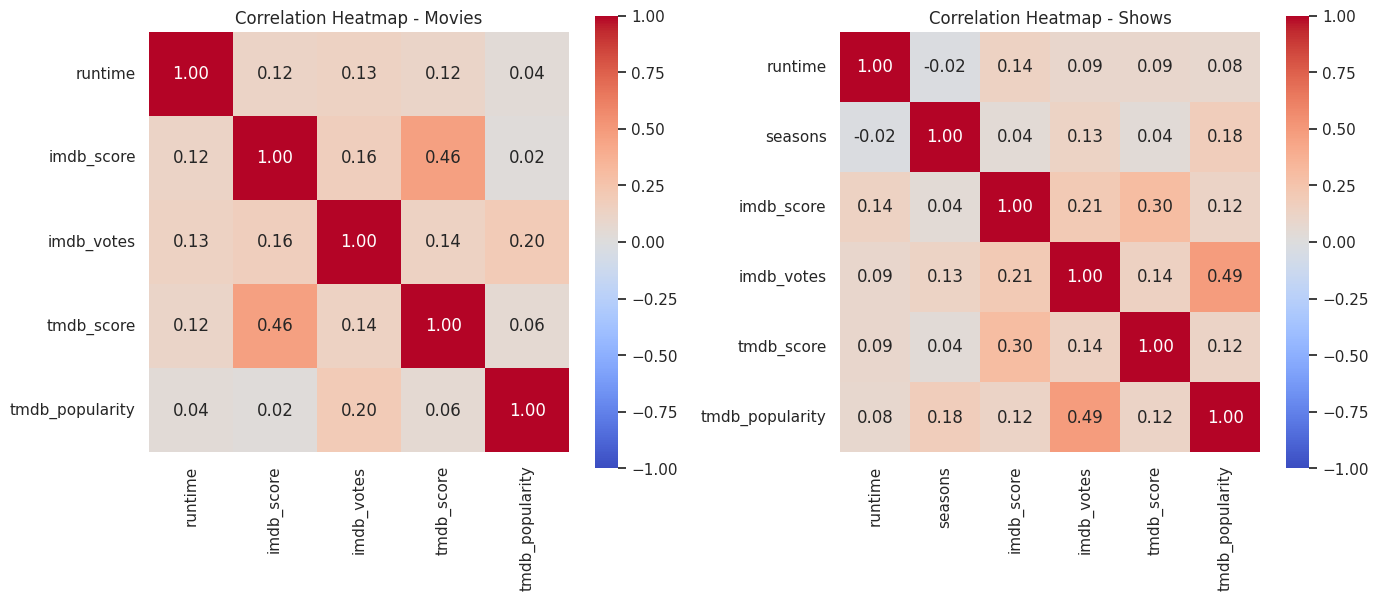

In [557]:
# Columns relevant for correlation
correlation_columns = [
    'runtime',
    'seasons',
    'imdb_score',
    'imdb_votes',
    'tmdb_score',
    'tmdb_popularity'
]
correlation_columns_Movies = [
    'runtime',
    'imdb_score',
    'imdb_votes',
    'tmdb_score',
    'tmdb_popularity'
]

# Subset data by content type
movies_df = df[df['type'] == 'MOVIE'][correlation_columns_Movies]
shows_df = df[df['type'] == 'SHOW'][correlation_columns]

# Create figure with subplots
plt.figure(figsize=(14, 6))

# Movie Correlation Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(movies_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True,vmin=-1, vmax=1)
plt.title('Correlation Heatmap - Movies')

# Show Correlation Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(shows_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True,vmin=-1, vmax=1)
plt.title('Correlation Heatmap - Shows')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?



* Shows relationships clearly with colors 🎨

* Summarizes many correlations in one view 📊

* Highlights strong/weak links instantly 👀

* Helps make quick, data-driven decisions ✅

* Heatmaps make complex data easy and visual! 🔥

##### 2. What is/are the insight(s) found from the chart?

**🎬 Insights from Movies Correlation Matrix**

**⭐ IMDb Score and TMDb Score Have a Moderate Positive Correlation (0.46)**

* Movies rated highly on IMDb also tend to get higher scores on TMDb. This shows consistent quality perception across different rating platforms. 👍

**👥 IMDb Votes and TMDb Popularity Are Weakly Positively Correlated (0.20)**

* More votes on IMDb usually correspond to somewhat higher popularity on TMDb, but this relationship is relatively weak. Popularity and engagement don't always move perfectly together. 📉📈

**⏳ Runtime Has Very Low Correlation with All Other Variables (Max ~0.13)**

* The length of a movie barely affects its ratings or popularity, suggesting movie duration is not a major factor in audience or critic reception. 🕒➡️❌

**📊 IMDb Votes and IMDb Score Are Weakly Positively Correlated (0.16)**

* Movies with higher user votes tend to have slightly better ratings, but the effect is small, indicating popular movies don’t always get higher scores. 🤷‍♂️

**🔥 TMDb Popularity Has Very Low Correlation with Scores (Close to 0)**

* TMDb popularity does not strongly correlate with either IMDb or TMDb scores, suggesting popularity and rating quality can be quite different dimensions. 🎭 vs 👑

**📺 Insights from Shows Correlation Matrix**

**⭐ IMDb Score and TMDb Score Have a Moderate Positive Correlation (0.30)**

* Similar to movies, shows with higher IMDb ratings also tend to score better on TMDb, indicating consistent quality perception across platforms. 👍

**🔥 IMDb Votes and TMDb Popularity Have a Strong Positive Correlation (0.49)**

* Shows with more user votes on IMDb are generally more popular on TMDb, reflecting strong audience engagement and visibility. 🎉👥

**📊 IMDb Score and IMDb Votes Have a Moderate Positive Correlation (0.21)**

* Shows with higher votes tend to have somewhat better ratings, though the relationship isn’t very strong — popularity doesn’t always mean higher scores. 🤔

**⏳ Runtime Has Very Weak Correlations with Other Variables (all below 0.14)**

* The length of episodes or shows does not significantly impact ratings or popularity, implying duration isn’t a key factor in audience reception. 🕒➡️❌

**📅 Seasons and TMDb Popularity Show a Slight Positive Correlation (0.18)**

* Shows with more seasons tend to have marginally higher popularity, possibly due to established fan bases or long-running interest. 📈📺

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**✅ 1. Invest More in High-Rated & Popular Genres**

**Insight:** Genres like Drama, Action, and Comedy dominate in volume and popularity.

**Action:** Boost production and acquisition of content in these genres to align with audience preferences.

**✅ 2. Expand Regionally Targeted Content**

**Insight:** Countries like the US, India, UK, Japan, and France are top content producers.

**Action:** Invest in regional originals and local language content to tap into specific markets and grow international viewership.

**✅ 3. Promote High IMDb/Popularity Content**

**Insight:** Titles like Titanic, The Chosen, and All the Old Knives have high ratings and popularity.

**Action:** Highlight these titles in personalized recommendations and featured banners to attract and retain users.

**✅ 4. Monitor Trends Over Time**

**Insight:** Significant content addition between 2018–2021, showing growth and demand.

**Action:** Maintain momentum by planning timely content releases aligned with market trends and seasonal demand.

# **Conclusion**

**📈 Growth Trajectory:** The platform has seen significant content expansion, especially from 2018 to 2021, indicating strong growth and audience demand.

**🎬 Genre & Type Trends:** Drama, Action, and Comedy dominate across both movies and shows. Shows have become increasingly popular, offering binge-worthy engagement.

**🌍 Global Diversity:** The U.S., India, and the U.K. lead in content production, suggesting where audience interest and investment are strongest.

**⭐ Audience Preferences:** High IMDb-rated and TMDb-popular titles show a clear preference for quality storytelling. These should be promoted to improve engagement and retention.